# Problem Definition
A model to recognize Credit Card Transactions Fraud Detection so that customers are not charged for items that they did not purchase.

# Evaluation
If we are able to reach an accuracy score of 95% and precision, recall and f1 score of 80% then our model is ready to go into production.

# Data
The dataset was generated using Sparkov Data Generation | Github tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were combined and converted into a standard format. By: Kartik Shenoy.

The dataset can be found on kaggle by the link provided below (https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv).

# Features
* index - Unique Identifier for each row
* transdatetrans_time - Transaction DateTime
* cc_num - Credit Card Number of Customer
* merchant - Merchant Name
* category - Category of Merchant
* amt - Amount of Transaction
* first - First Name of Credit Card Holder
* last - Last Name of Credit Card Holder
* gender - Gender of Credit Card Holder
* street - Street Address of Credit Card Holder
* city - City of Credit Card Holder
* state - State of Credit Card Holder
* zip - Zip of Credit Card Holder
* lat - Latitude Location of Credit Card Holder
* long - Longitude Location of Credit Card Holder
* city_pop - Credit Card Holder's City Population
* job - Job of Credit Card Holder
* dob - Date of Birth of Credit Card Holder
* trans_num - Transaction Number
* unix_time - UNIX Time of transaction
* merch_lat - Latitude Location of Merchant
* merch_long - Longitude Location of Merchant
* is_fraud - Fraud Flag <--- Target Class

Information about the Simulator
I do not own the simulator. Kartik Shenoy used the one used by Brandon Harris and just to understand how it works, Kartik Shenoy went through few portions of the code. This is what Kartik Shenoy understood from what he read:

The simulator has certain pre-defined list of merchants, customers and transaction categories. And then using a python library called "faker", and with the number of customers, merchants that Brandon Harris mention during simulation, an intermediate list is created.

After this, depending on the profile you choose for e.g. "adults 2550 female rural.json" (which means simulation properties of adult females in the age range of 25-50 who are from rural areas), the transactions are created. Say, for this profile, you could check "Sparkov | Github | adults2550female_rural.json", there are parameter value ranges defined in terms of min, max transactions per day, distribution of transactions across days of the week and normal distribution properties (mean, standard deviation) for amounts in various categories. Using these measures of distributions, the transactions are generated using faker.

What  Kartik Shenoy did was generate transactions across all profiles and then merged them together to create a more realistic representation of simulated transactions. Thanks to  Kartik Shenoy I also have a dataset to work on for fraud detection system.

# Getting our tools ready.

In [83]:
#Import neccessary libries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#import scikit learn libries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

#Algorithms to build our models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, \
f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score

#Import other libries
import pickle

# Exploratory data analysis(getting our data ready)

In [88]:
#import our data
fraud_train = pd.read_csv("data/fraudTrain.csv", nrows=10000, na_values="?") #Taking 10000 samples

#display some part of the dataset
fraud_train.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [3]:
#Check the lenght of the dataset
print(f"The lenght of the dataset is {len(fraud_train)}")

The lenght of the dataset is 10000


In [4]:
#Check both the total number of rows and columns
fraud_train.shape

(10000, 23)

The above dataset have a row of **10000** and a column of **23**. Let's keep on exploring the dataset.

In [5]:
#Display dataset metadata
fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   trans_date_trans_time  10000 non-null  object 
 2   cc_num                 10000 non-null  int64  
 3   merchant               10000 non-null  object 
 4   category               10000 non-null  object 
 5   amt                    10000 non-null  float64
 6   first                  10000 non-null  object 
 7   last                   10000 non-null  object 
 8   gender                 10000 non-null  object 
 9   street                 10000 non-null  object 
 10  city                   10000 non-null  object 
 11  state                  10000 non-null  object 
 12  zip                    10000 non-null  int64  
 13  lat                    10000 non-null  float64
 14  long                   10000 non-null  float64
 15  cit

from the above provided information, the dataset contains categorical features, does not contain null values and some column names are also unkmown. We change the names of some of the unknown features and also drop those which are not relevant. Let's continue to explore our dataset.

In [6]:
#Display total number of each dataset inside is_fraud feature
fraud_train['is_fraud'].value_counts()

0    9953
1      47
Name: is_fraud, dtype: int64

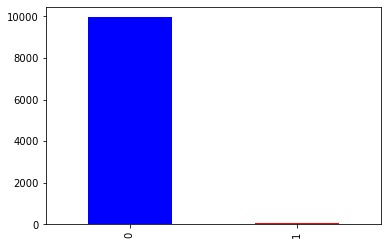

The difference between not fraud and fraud equals 9906


In [7]:
#Virsualize the value counts
fraud_train['is_fraud'].value_counts().T.plot(kind='bar', color=["blue","red"])

plt.show()
print(f"The difference between not fraud and fraud equals {9953 - 47}")

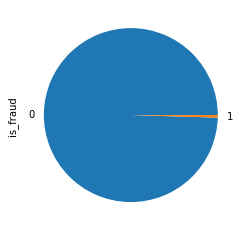

The difference between not fraud and fraud equals 9906


In [8]:
fraud_train['is_fraud'].value_counts().T.plot(kind='pie')
plt.show()
print(f"The difference between not fraud and fraud equals {9953 - 47}")

From the above graphs and the value counts, the difference between the fraud and not fraud is 9906. The fraud transactions are less than transactions which are not fraud. Also the difference between them is very high. This means the dataset is imbalanced. We can deal with imbalanced dataset using uder_sampling, over_sampling and BalancedRandomForestClassifier depending on the type of data we're working on. But we won't use the above techniques, rather we will use **stratify=y** which is found in scikit learn train_test_split when we're splitting our datasets into trainning and testing.

In [9]:
#Lets display the last three values of our dataset
fraud_train.tail(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
9997,9997,2019-01-07 03:53:12,4689147265057948423,fraud_Dooley Inc,shopping_pos,5.71,Steven,Brooks,M,2622 Reynolds Isle,...,40.9207,-96.1680,206,Human resources officer,1967-10-04,bd13638cdbdd8c0fc68362f8a9653a68,1325908392,40.633368,-96.595273,0
9998,9998,2019-01-07 03:53:51,373905417449658,fraud_Schamberger-O'Keefe,grocery_pos,231.45,Sarah,Bishop,F,554 Mcdonald Valley Apt. 539,...,31.9290,-97.6443,2526,Phytotherapist,1970-11-12,18a1437e003f662dfe1c3d58050ae692,1325908431,32.807117,-98.639187,0
9999,9999,2019-01-07 03:53:54,3556613125071656,fraud_Strosin-Cruickshank,grocery_pos,49.49,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,9085c17e4e64b08d4651ad37e254a003,1325908434,29.378479,-95.406067,0


Before we continue exploring our dataset lets drop the column "`unknown: 0"`. This is because it will not add any functionality in our model training. Its basically an index that got exported when exporting the dataset and may also slow down our model training.

In [10]:
#Drop column unnamed
fraud_train.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
#Confirmed droped column
fraud_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
#Lets check for the min and max value of each column
fraud_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,4.240166e+17,68.413486,49325.435300,38.593693,-90.617579,8.985338e+04,1.325645e+09,38.593578,-90.608638,0.004700
std,1.318553e+18,111.527924,27188.598694,5.180796,14.458799,3.001198e+05,1.679003e+05,5.209553,14.476713,0.068399
min,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,1.800365e+14,9.690000,25832.000000,34.778900,-97.171400,7.410000e+02,1.325472e+09,34.847390,-97.224395,0.000000
50%,3.520550e+15,48.675000,48438.000000,39.383200,-87.724600,2.398000e+03,1.325654e+09,39.370857,-87.664080,0.000000
75%,4.657269e+15,83.092500,72341.000000,41.846700,-80.128400,1.909000e+04,1.325801e+09,41.899369,-80.181638,0.000000
max,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325908e+09,66.645176,-66.967742,1.000000


## From the above dataset, the column:
* **amt** has a min value of **1.0** and max value of **12788.070000**.
* **zip** has a min value of **1257.00000** and max value of **99783.00000**.
* **merch_lat** has a min value of **19.042510** and max value of **66.659**.
When you look close to the others, their minimum value is very low and have a higher max value. This means there is a greate outlier in this dataset.
## Note: 
Not all outliers are outliers depending on the use case. We should know that we are dealing with a fraud detection system on a credit card were every part of the data is very important. Hence we wont be dropping any outliers in our datasets.

In [13]:
fraud_train.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [14]:
#Let's split our dataset into features and labels
x=fraud_train.drop('is_fraud', axis=1)
y=fraud_train['is_fraud']

In [15]:
#Display x values
x.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462


In [16]:
#Display y values
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

# Feature Selection
Lets perform on manual feature selection using pearson correlation. With pearson correlation, we can remove all any feature that is highly correlated to other features. We have to remove them because, they both serve the smae purpose during model training hence they will slow down our trainning of our model. Before we get started, let's first virsualize our higly correlated features using heatmap.

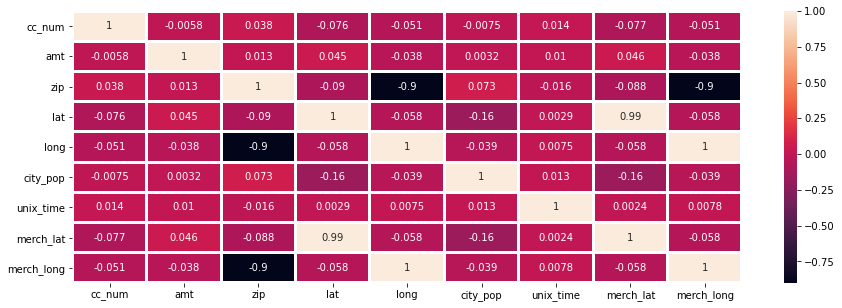

In [17]:
#Lets check our dataset to see if they are highly correlated
plt.figure(figsize=(15,5))
sns.heatmap(x.corr(), annot=True, linewidths=2)
plt.show()

In [18]:
#Lets drop all higly correlated features from our datasets
def high_correlated(datasets, threshold):
    cor_col = set()
    cor_mat = datasets.corr()
    for i in range(len(cor_mat.columns)):
        for j in range(i):
            if abs(cor_mat.iloc[i, j]) > threshold:
                colname = cor_mat.columns[i]
                cor_col.add(colname)
    return cor_col

In [19]:
#Call our function
corr_features = high_correlated(x, 0.90)

#Display results
corr_features

{'long', 'merch_lat', 'merch_long'}

From the above we can see our list of highly correlated features. Now we can drop them to improve the accuracy of our model during trainning time.

In [20]:
#Let's drop our highly correlated features now
x.drop(corr_features, axis=1, inplace=True)

In [21]:
#display all columns to confirmed our deleted columns
x.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'city_pop', 'job', 'dob', 'trans_num', 'unix_time'],
      dtype='object')

From the above we can see that we have been able to remove all our highly correlated features. Let's re-draw our diagram do confirm our dropped columns.

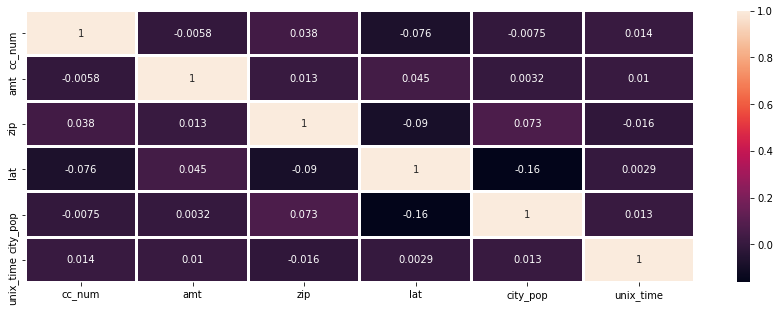

In [22]:
#Lets check our dataset to see if they are highly correlated
plt.figure(figsize=(15,5))
sns.heatmap(x.corr(), annot=True, linewidths=2)
plt.show()

From the graph also, we can see that there are no highly correlated features in our datasets. We will continue our feature selection using scikit learn pipelines.

# Feature Engineering, Feature Selection, Feature Scaling and Model Building.
We are going to use scikit learn **ColumnTransformer** and **Pipeline** to perform our feature engineering, selection, scaling and building of our model.

### Feature Engineering.
There are many techniques to convert non numeric types to numeric. Some include LabelEncoder, OrdinalEncoder and OneHotEncoder. From scikit learn documentation:

* LabelEncoder should be used on **target or dependent variable**.
* OrdinalEncoder should be used on **independent variables** which are in orderly form.
* OneHotEncoder is the main one to use if not the above. Note: But on **idenpendent variables**.

So we are going to use **OneHotEncoder** to transform all non numeric features to numeric features.

### Feature Selection.
With feature selection, We are going to use **Filtering techniques** which include
* Removing of constant features.
* Removing of Quasi features.
* Removing of duplicated features. 

We will be using all the above techniques except removing of duplicated features.

### Model Building.
We are going to build our model with five(5) different algorithms. After that we will select the one that performed well by meeting our evaluation stated above. The algorithms we are going to use include the following:
* Linear Regression.
* KNN.
* Naive Bayes (GaussianNB).
* Decision Tree Classifier.
* Random Forest Classifier.

In [23]:
#display columns type
x.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
dtype: object

In [24]:
#split data into trainning and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

#Place all category and object features into cat_types variable
cat_types = list(x_train.select_dtypes(include=["category","object"]))

#Place all numeric features into num_type variable
num_types = list(x_train.select_dtypes(exclude=["category","object"]))

#Categorical features
print(f"**Categorical features**\n\n {cat_types}")
print("")
#Numeric features
print(f"**Numerical features**\n\n {num_types}")

**Categorical features**

 ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

**Numerical features**

 ['cc_num', 'amt', 'zip', 'lat', 'city_pop', 'unix_time']


We are going to perform two(2) steps here. One is encoding our categorical features and the other is to scale our numeric features. Before we get started lets just create a simple function which we will use to evaluate our model after building it.

In [25]:
#Evaluation function
def evaluate_model(y_test, y_pred):
    """
    This function will evaluate our model
    using precision, accuracy, recall, f1
    ans confusion marixs
    """
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    matrics = {
        "Accuracy Score": round(accuracy,2),
        "f1 score": round(f1,2),
        "Precision Score": round(precision,2),
        "Recall Score": round(recall,2)
    }
    
    print(f"The accuracy score is {accuracy*100:.2f}%")
    print(f"The f1 score is {f1*100:.2f}%")
    print(f"The precision score is {precision*100:.2f}%")
    print(f"The recall score is {recall*100:.2f}%")
    
    return matrics


In [26]:
#Make the transformation
column_transform = ColumnTransformer([
    ("Step1: Encode-Categorical-Features", #One hot encode categorical features
     OneHotEncoder(sparse=False, handle_unknown='ignore'), 
    ['trans_date_trans_time',
     'merchant',
     'category',
     'first',
     'last',
     'gender',
     'street',
     'city', 
     'state',
     'job',
     'dob',
     'trans_num']),
("Step2: Scale-Numeric-Features", RobustScaler(), #Scale all numeric features
     ['cc_num',
      'amt',
      'zip',
      'lat',
      'city_pop',
      'unix_time']),
], remainder="passthrough")

## 1. Logistice Regression

In [27]:
#Pipeline using Logistic Regression Algorithm
log_pip = Pipeline([
    ("Step1: Logistic-ColumnTransformer", column_transform),
    ("Step2: Remove-Constant-Features", VarianceThreshold(threshold=0)), #Remove constant features
    ("Step3: Remove-Quasi-Features", VarianceThreshold(threshold=0.01)), #Remove Quasi features
    ("Step4: Logistic-Regression", LogisticRegression(max_iter=1000)) #Increase the max_iter
])
np.random.seed(42)

In [28]:
#Now fit our logistic regression model
log_pip.fit(x_train, y_train)

Pipeline(steps=[('Step1: Logistic-ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Step1: '
                                                  'Encode-Categorical-Features',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['trans_date_trans_time',
                                                   'merchant', 'category',
                                                   'first', 'last', 'gender',
                                                   'street', 'city', 'state',
                                                   'job', 'dob', 'trans_num']),
                                                 ('Step2: '
                                                  'Scale-Numeric-Features',
                                                  Robu

In [29]:
#Now lets make our prediction using our linear model
ypred_logistic = log_pip.predict(x_test)

#Display result
ypred_logistic

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
#Lets score our model
log_pip.score(x_test, y_test)

0.9965

In [31]:
#Call function to evaluate model
logistic_evaluated = evaluate_model(y_test, ypred_logistic)

#Display result
logistic_evaluated

The accuracy score is 99.65%
The f1 score is 53.33%
The precision score is 66.67%
The recall score is 44.44%


{'Accuracy Score': 1.0,
 'f1 score': 0.53,
 'Precision Score': 0.67,
 'Recall Score': 0.44}

In [32]:
#The cross validation score of logistic regression
np.random.seed(42)
print(f"Cross val score equals: {np.mean(cross_val_score(log_pip, x, y, cv=5))}")

Cross val score equals: 0.9955999999999999


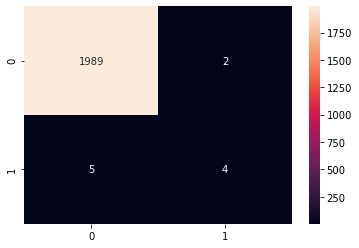

In [33]:
sns.heatmap(confusion_matrix(y_test, ypred_logistic), annot=True, fmt='g')
plt.show()

In [34]:
print(classification_report(y_test, ypred_logistic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       0.67      0.44      0.53         9

    accuracy                           1.00      2000
   macro avg       0.83      0.72      0.77      2000
weighted avg       1.00      1.00      1.00      2000



## Conclusion:
With our logistic regression, we are getting an:

* An accuracy score of **1**
* A precision score of **0.71**
* A recall score of **0.56** and
* An f1 score of **63**.

Even though we have achieved 100% accuracy score, our Evaluation from above needs a precision, recall and f1 score of 80%. Hence we wont be using this model in production. Let's try our hands on other algorithms to. Moving on to KNeighborsClassifier.

## 2. KNeighborsClassifier

In [35]:
#Pipeline using KNeighbors Classifier Algorithm
knn_pip = Pipeline([
    ("Step1: Logistic-ColumnTransformer", column_transform),
    ("Step2: Remove-Constant-Features", VarianceThreshold(threshold=0)), #Remove Constant
    ("Step3: Remove-Quasi-Features", VarianceThreshold(threshold=0.01)), #Remove Quasi
    ("Step4: Logistic-Regression", KNeighborsClassifier())
])

In [36]:
knn_pip.fit(x_train, y_train)

Pipeline(steps=[('Step1: Logistic-ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Step1: '
                                                  'Encode-Categorical-Features',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['trans_date_trans_time',
                                                   'merchant', 'category',
                                                   'first', 'last', 'gender',
                                                   'street', 'city', 'state',
                                                   'job', 'dob', 'trans_num']),
                                                 ('Step2: '
                                                  'Scale-Numeric-Features',
                                                  Robu

In [37]:
#Now lets make our prediction using our linear model
ypred_knn = knn_pip.predict(x_test)

#Display result
ypred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
#Lets score our model
log_pip.score(x_test, y_test)

0.9965

In [39]:
#Call function to evaluate model
knn_evaluated = evaluate_model(y_test, ypred_knn)

#Display result
knn_evaluated

The accuracy score is 99.75%
The f1 score is 73.68%
The precision score is 70.00%
The recall score is 77.78%


{'Accuracy Score': 1.0,
 'f1 score': 0.74,
 'Precision Score': 0.7,
 'Recall Score': 0.78}

In [40]:
#The cross validation score of logistic regression
print(f"Cross val score equals: {np.mean(cross_val_score(knn_pip, x, y, cv=5))}")

Cross val score equals: 0.9953


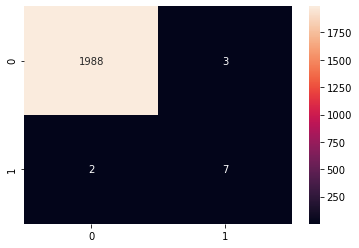

In [41]:
sns.heatmap(confusion_matrix(y_test, ypred_knn), annot=True, fmt='g')
plt.show()

In [42]:
print(classification_report(y_test, ypred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       0.70      0.78      0.74         9

    accuracy                           1.00      2000
   macro avg       0.85      0.89      0.87      2000
weighted avg       1.00      1.00      1.00      2000



## Conclusion:
With our KNeighborsClassifier(KNN), we are getting an:

* An accuracy score of **1**
* A precision score of **0.6**
* A recall score of **0.67** and
* An f1 score of **63**.

Even though we achieved 100% accuracy score, our Evaluation from above needs a precision, recall and f1 score of 80%, hence we wont be using this model in production. Let's try our hands on Naive Bayes algorithms.

## 3. GaussianNB or Naive Bayes

In [43]:
#Pipeline using Naive Bayes Algorithm
nb_pip = Pipeline([
    ("Step1: Logistic-ColumnTransformer", column_transform),
    ("Step2: Remove-Constant-Features", VarianceThreshold(threshold=0)), #Remove Constant
    ("Step3: Remove-Quasi-Features", VarianceThreshold(threshold=0.01)), #Remove Quasi
    ("Step4: Logistic-Regression", GaussianNB())
])

In [44]:
nb_pip.fit(x_train, y_train)

Pipeline(steps=[('Step1: Logistic-ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Step1: '
                                                  'Encode-Categorical-Features',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['trans_date_trans_time',
                                                   'merchant', 'category',
                                                   'first', 'last', 'gender',
                                                   'street', 'city', 'state',
                                                   'job', 'dob', 'trans_num']),
                                                 ('Step2: '
                                                  'Scale-Numeric-Features',
                                                  Robu

In [45]:
#Now lets make our prediction using our linear model
ypred_nb = nb_pip.predict(x_test)

#Display result
ypred_nb

array([1, 1, 0, ..., 0, 0, 0])

In [46]:
#Lets score our model
nb_pip.score(x_test, y_test)

0.905

In [47]:
#Call function to evaluate model
nb_evaluated = evaluate_model(y_test, ypred_nb)

#Display result
nb_evaluated

The accuracy score is 90.50%
The f1 score is 6.86%
The precision score is 3.59%
The recall score is 77.78%


{'Accuracy Score': 0.9,
 'f1 score': 0.07,
 'Precision Score': 0.04,
 'Recall Score': 0.78}

In [48]:
#The cross validation score of Naive Bayes
print(f"Cross val score equals: {np.mean(cross_val_score(nb_pip, x, y, cv=5))}")

Cross val score equals: 0.8912000000000001


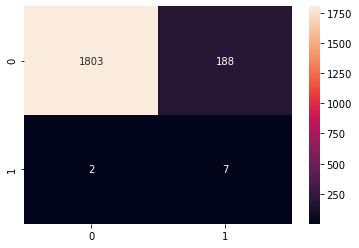

In [49]:
sns.heatmap(confusion_matrix(y_test, ypred_nb), annot=True, fmt='g')
plt.show()

In [50]:
print(classification_report(y_test, ypred_nb))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1991
           1       0.04      0.78      0.07         9

    accuracy                           0.91      2000
   macro avg       0.52      0.84      0.51      2000
weighted avg       0.99      0.91      0.95      2000



## Conclusion:
With our Naive Bayes, we are getting:

* An accuracy score of 0.90.
* A precision score of 0.4.
* A recall score of 0.78.
* An f1 score of 0.07.

Even though we achieved 90% accuracy score, our Evaluation from above needs a precision, recall and f1 score of 80% and we have not yet reached our target, we wont be using this model in production. Let's try our hands on Random Forest Classifier.

## Note:
From all the above models built using other algorithms, we can still improve uporn it by increasing its hyperparameters using **RandomizedSearchCV** and **GridSearchCV**.

## 4. Random Forest Classifier

In [51]:
#Pipeline using Random Forest Classifier Algorithm
rfc_pip = Pipeline([
    ("Step1: Logistic-ColumnTransformer", column_transform),
    ("Step2: Remove-Constant-Features", VarianceThreshold(threshold=0)),#Remove constant
    ("Step3: Remove-Quasi-Features", VarianceThreshold(threshold=0.01)),#Remove Quasi
    ("Step4: Logistic-Regression", RandomForestClassifier())
])

In [52]:
rfc_pip.fit(x_train, y_train)

Pipeline(steps=[('Step1: Logistic-ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Step1: '
                                                  'Encode-Categorical-Features',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['trans_date_trans_time',
                                                   'merchant', 'category',
                                                   'first', 'last', 'gender',
                                                   'street', 'city', 'state',
                                                   'job', 'dob', 'trans_num']),
                                                 ('Step2: '
                                                  'Scale-Numeric-Features',
                                                  Robu

In [53]:
#Initialize prediction
rfc_nb = rfc_pip.predict(x_test)

#Display results
rfc_nb

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
#Lets score our model
rfc_pip.score(x_test, y_test)

0.9985

In [55]:
#Call function to evaluate model
rfc_evaluated = evaluate_model(y_test, rfc_nb)

#Display result
rfc_evaluated

The accuracy score is 99.85%
The f1 score is 82.35%
The precision score is 87.50%
The recall score is 77.78%


{'Accuracy Score': 1.0,
 'f1 score': 0.82,
 'Precision Score': 0.88,
 'Recall Score': 0.78}

In [56]:
#Random forest classifier cross val score
print(f"Cross val score equals: {np.mean(cross_val_score(rfc_pip, x, y, cv=5))}")

Cross val score equals: 0.9981


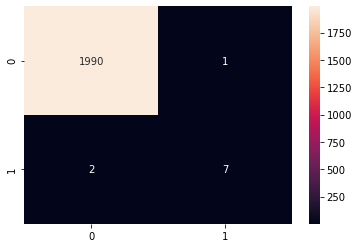

In [57]:
sns.heatmap(confusion_matrix(y_test, rfc_nb), annot=True, fmt='g')
plt.show()

In [58]:
print(classification_report(y_test, rfc_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       0.88      0.78      0.82         9

    accuracy                           1.00      2000
   macro avg       0.94      0.89      0.91      2000
weighted avg       1.00      1.00      1.00      2000



# Conclusion:
With our Random Forest, we are getting:

* An accuracy score of 1.
* A precision score of 0.88.
* A recall score of 0.78.
* An f1 score of 0.82.

!Well, we have reached our target from our Evaluation. Even though our recall score is 78, we can use this model in production. But since we descided to use five(5) different algorithms, let's try our hands on the last one which is decision tree classifier.

## 5. Decision Tree Classifier

In [59]:
#Pipeline using Decision Tree Algorithm
dt_pip = Pipeline([
    ("Step1: Logistic-ColumnTransformer", column_transform),
    ("Step2: Remove-Constant-Features", VarianceThreshold(threshold=0)), #Remove Constant
    ("Step3: Remove-Quasi-Features", VarianceThreshold(threshold=0.01)), #Remove Quasi
    ("Step4: Logistic-Regression", DecisionTreeClassifier())
])

In [60]:
#Fit model
dt_pip.fit(x_train, y_train)

Pipeline(steps=[('Step1: Logistic-ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Step1: '
                                                  'Encode-Categorical-Features',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['trans_date_trans_time',
                                                   'merchant', 'category',
                                                   'first', 'last', 'gender',
                                                   'street', 'city', 'state',
                                                   'job', 'dob', 'trans_num']),
                                                 ('Step2: '
                                                  'Scale-Numeric-Features',
                                                  Robu

In [61]:
#Initialize prediction
dt_ypred = dt_pip.predict(x_test)

#Display results
dt_ypred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
#Lets score our model
dt_pip.score(x_test, y_test)

0.9995

In [63]:
#Call function to evaluate model
dt_evaluated = evaluate_model(y_test, dt_ypred)

#Display result
dt_evaluated

The accuracy score is 99.95%
The f1 score is 94.74%
The precision score is 90.00%
The recall score is 100.00%


{'Accuracy Score': 1.0,
 'f1 score': 0.95,
 'Precision Score': 0.9,
 'Recall Score': 1.0}

In [64]:
print(f"Cross val score equals: {np.mean(cross_val_score(dt_pip, x, y, cv=5))}")

Cross val score equals: 0.9974000000000001


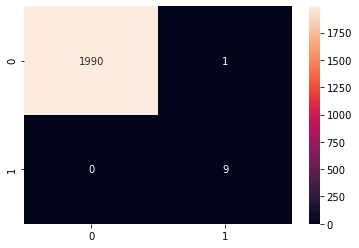

In [65]:
sns.heatmap(confusion_matrix(y_test, dt_ypred), annot=True, fmt='g')
plt.show()

In [66]:
print(classification_report(y_test, dt_ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       0.90      1.00      0.95         9

    accuracy                           1.00      2000
   macro avg       0.95      1.00      0.97      2000
weighted avg       1.00      1.00      1.00      2000



# Conclusion.
With Decision Tree, we were able to score 1(100% score), having a good precision, recall and f1 score. Hence we can also use this model in production. We can still improve uporn it just like the rest of the algorithm. But since **DecisionTreeClassifier** give us a good:
* Accuracy Score.
* Recall Score.
* F1 Score.
* Precision score.<br><br>
We will be using it in production.

Now we have to choose between **RandomForestClassifier** and a **DecisionTreeClassifier**. Let's virsualize our models and decide on which algorithm to use between the two.

## Now Lets place our results in a dataframe from all the algorithms

In [67]:
#Place out baseline prediction in a dataframe
baseline_prediction = pd.DataFrame({
    "Logistice Regression":logistic_evaluated,
    "KNeighborsClassifier": knn_evaluated,
    "Naiv Bayes": nb_evaluated,
    "Decision Tree": dt_evaluated,
    "Random Forest": rfc_evaluated
})

#Display results
baseline_prediction

,Logistice Regression,KNeighborsClassifier,Naiv Bayes,Decision Tree,Random Forest
Accuracy Score,1.00,1.00,0.90,1.00,1.00
f1 score,0.53,0.74,0.07,0.95,0.82
Precision Score,0.67,0.70,0.04,0.90,0.88
Recall Score,0.44,0.78,0.78,1.00,0.78


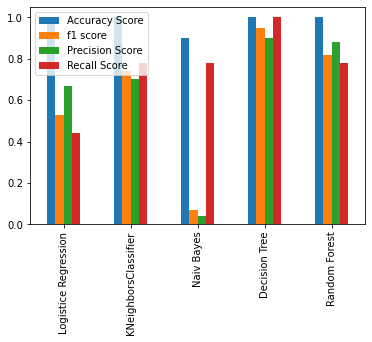

In [68]:
#Lets visualize our baseline predictions
baseline_prediction.T.plot(kind='bar')
plt.show()

Since we have decide to use the one built using RandomForestClassifier, lets explore it more. First let's try to find the **feature importance** from the model.

In [69]:
#Display pipeline steps
rfc_pip

Pipeline(steps=[('Step1: Logistic-ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Step1: '
                                                  'Encode-Categorical-Features',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['trans_date_trans_time',
                                                   'merchant', 'category',
                                                   'first', 'last', 'gender',
                                                   'street', 'city', 'state',
                                                   'job', 'dob', 'trans_num']),
                                                 ('Step2: '
                                                  'Scale-Numeric-Features',
                                                  Robu

In [70]:
#Display all name steps
rfc_pip.named_steps

{'Step1: Logistic-ColumnTransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('Step1: Encode-Categorical-Features',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  ['trans_date_trans_time', 'merchant',
                                   'category', 'first', 'last', 'gender',
                                   'street', 'city', 'state', 'job', 'dob',
                                   'trans_num']),
                                 ('Step2: Scale-Numeric-Features',
                                  RobustScaler(),
                                  ['cc_num', 'amt', 'zip', 'lat', 'city_pop',
                                   'unix_time'])]),
 'Step2: Remove-Constant-Features': VarianceThreshold(threshold=0),
 'Step3: Remove-Quasi-Features': VarianceThreshold(threshold=0.01),
 'Step4: Logistic-Regression': RandomForestClassifier()}

In [71]:
#Navigate to 'Step4: Logistic-Regression' and display feature importances
rfc_pip.named_steps['Step4: Logistic-Regression'].feature_importances_

array([3.66381620e-03, 1.36361838e-03, 9.78780697e-03, 2.49513417e-03,
       2.80182063e-02, 2.66554400e-03, 6.85020309e-03, 1.95971908e-03,
       9.55751456e-03, 4.48722739e-03, 1.57918136e-03, 1.38080717e-02,
       6.93248342e-03, 5.37776509e-03, 7.37873334e-05, 1.07793200e-04,
       3.71821608e-05, 1.17063871e-03, 6.36861693e-04, 1.34948653e-03,
       3.96621848e-06, 9.67330142e-06, 9.73589816e-06, 3.56543176e-04,
       2.52609647e-06, 1.64221273e-05, 8.74600659e-05, 7.51621355e-07,
       1.07540115e-04, 5.18048371e-06, 2.79333905e-04, 9.08694262e-05,
       3.00672058e-06, 6.31820482e-05, 1.89640734e-05, 3.85494767e-04,
       2.78751152e-05, 1.56250661e-02, 8.92418801e-03, 6.23065724e-04,
       2.04742449e-06, 6.71926556e-04, 2.28951667e-04, 5.07512041e-04,
       3.28980846e-06, 6.26162723e-06, 3.60450863e-05, 9.68316732e-05,
       2.51541100e-05, 3.10043433e-04, 6.78994822e-06, 8.38978307e-04,
       9.39360306e-06, 2.71724158e-03, 3.24836188e-06, 1.16973119e-02,
      

In [72]:
#Display feature names
rfc_pip.named_steps['Step1: Logistic-ColumnTransformer'].named_transformers_['Step1: Encode-Categorical-Features'].get_feature_names()

array(['x0_2019-01-01 00:00:44', 'x0_2019-01-01 00:01:16',
       'x0_2019-01-01 00:03:06', ...,
       'x11_ffe44e74334a90c38bbbade939a3f651',
       'x11_ffe59d13dcbf7e3a3dedf959d156204d',
       'x11_ffea23eb0e94832b1ac22affb1a23d79'], dtype=object)

## Final Conclusion in choosing our algorithm.
We have tried our hands on five(5) different algorithms which include:

* Naive Bayes
* Logistic Regression
* KNN
* RandomForestClassifier
* DecisionTreeClassifier

Now we have to decide on the algorithm that we will use in production. Since our model had a good accuracy score and precision, recall and f1 socre on **RandomForestClassifier** and **DecisionTreeClassifier** and also meets our evaluation, We will decide between this two.

# Choosing our algorithm:
We will be using RandomForestClassifier since it uses decision tree algorithm. So its like killing on two birds with one stone.

In [80]:
#Export model using pickle
pickle.dump(rfc_pip, open("randomForestClassifier.pkl","wb"))

In [82]:
#Load dump data and test
randomForest = pickle.load(open("randomForestClassifier.pkl","rb"))

#Make prediction
pred = randomForest.predict(x_test)

#Display predicted values
pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Now we are done building our model using and choose RandomForestClassifier for our model. But we can still try our model with other Machine Learning Algorithms to get even more accurate score.